In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# libraries to import the .mat files
import scipy.io as sio
import h5py

In [3]:
# importing os to get the current directory
import os
import sys

<h1 style="font-size:50px;">Loading Data</h1>

- We use the naming format of the data files to extract the information from them and store them in the dataframe ```data``` variable.
- The ```data``` variable stores a dictionary where each key corresponds to a file (We might consolidate all the entries into one dataframe later on). Each entry in the dictionary stores a list of datapoints. 
- Each datapoint is a dictionary with the following keys: 
    - <i>PID</i>: Patient ID
    - <i>image</i>: Image data
    - <i>label</i>: Label of the image
    - <i>tumorBorder</i>: Tumor border data
    - <i>tumorMask</i>: Tumor mask data

In [4]:
# Define the directory where the data is located
data_dir = 'data'

# Get a list of all subdirectories in the data directory that start with 'brainTumorDataPublic_'
data_dirs = [f for f in os.listdir(data_dir) if f.startswith('brainTumorDataPublic_') and os.path.isdir(os.path.join(data_dir, f))]

# Initialize an empty list to store the data
data = {}
counter = 0
dir_counter = 0

# Loop over each subdirectory
for d in data_dirs:

    data[dir_counter] = []

    # Get a list of all .mat files in the subdirectory
    files = [f for f in os.listdir(os.path.join(data_dir, d)) if f.endswith('.mat')]
    
    # Load each .mat file and append it to the data list
    for f in files:
        with h5py.File(os.path.join(data_dir, d, f), 'r') as file:
            # Access the 'cjdata' group
            cjdata = file['cjdata']

            # Initialize an empty dictionary to store the data from this file
            file_data = {}
            
            # Convert the data to a numpy array and append it to the data list
            for name in cjdata:
                # Add the member to the dictionary
                file_data[name] = np.array(cjdata[name])
                if name == 'label':
                    file_data[name] = file_data[name][0][0]
            # Append the dictionary to the data list
            data[dir_counter].append(file_data)

            # Increment the counter
            counter += 1
            # print the PID and label
            # print(f'Counter: {counter}')
    dir_counter += 1
            

<h1 style="font-size:50px;">Exploratory Data Analysis</h1>

# Understanding Data Attributes

In [5]:
# print the number of keys in data
print(f'Number of keys in data: {len(data)}')

# Print the labels of the first sample
print(f'Labels: {data[0][0].keys()}')

# Print the number of samples
print(f'Number of samples: {len(data)}')

Number of keys in data: 4
Labels: dict_keys(['PID', 'image', 'label', 'tumorBorder', 'tumorMask'])
Number of samples: 4


# Exploring each data entry

In [6]:
# for the first 3 samples, print the keys and the shape of the data
for i in range(3):
    print(f'Sample {i}:')
    for key in data[0][i]:
        print(f'  {key}: {data[0][i][key].shape}')

Sample 0:
  PID: (6, 1)
  image: (512, 512)
  label: ()
  tumorBorder: (1, 38)
  tumorMask: (512, 512)
Sample 1:
  PID: (6, 1)
  image: (512, 512)
  label: ()
  tumorBorder: (1, 26)
  tumorMask: (512, 512)
Sample 2:
  PID: (6, 1)
  image: (512, 512)
  label: ()
  tumorBorder: (1, 42)
  tumorMask: (512, 512)


# Visualizing the data

In [7]:
# Function to display all the attributes of a datapoint

def display_data(datum):
    print(f'Label = {datum["label"]}')
    print(f"Image shape: {datum['image'].shape}, dtype: {datum['image'].dtype}")
    print(f"Tumor Mask shape: {datum['tumorMask'].shape}, dtype: {datum['tumorMask'].dtype}")
    print(f"Tumor Border shape: {datum['tumorBorder'].shape}, dtype: {datum['tumorBorder'].dtype}")
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    ax[0].imshow(datum['image'], cmap='gray')
    ax[0].set_title('Image')
    ax[1].imshow(datum['tumorMask'], cmap='gray')
    ax[1].set_title('Tumor Mask')
    ax[2].imshow(datum['image'], cmap='gray')
    tumor_border_coords = datum['tumorBorder'].reshape(-1, 2)  # Assuming it's a list of (x, y) coordinates
    #draw tumor border onto image using coordinates from tumor border
    for i in range(tumor_border_coords.shape[0] - 1):
        y1, x1 = tumor_border_coords[i]
        y2, x2 = tumor_border_coords[i + 1]
        ax[2].plot([x1, x2], [y1, y2], 'r')  # Drawing red lines between consecutive points
    ax[2].set_title('Tumor Border')
    just_tumor = np.zeros_like(datum['tumorMask'])
    just_tumor = datum['image'] * datum['tumorMask']
    # just_tumor[datum['tumorMask'] == 1] = datum['image'][datum['tumorMask'] == 1]
    ax[3].imshow(just_tumor, cmap='gray')
    ax[3].set_title('Just Tumor')
    plt.show()

### Printing a few datapoints for each tumor type

Here, we use the label attribute to get the tumor type of each image. We then print a few images for each tumor type to get a sense of the data. <br>
We have also created a function that visualizes the images in the data. 

Label = 1.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 38), dtype: float64


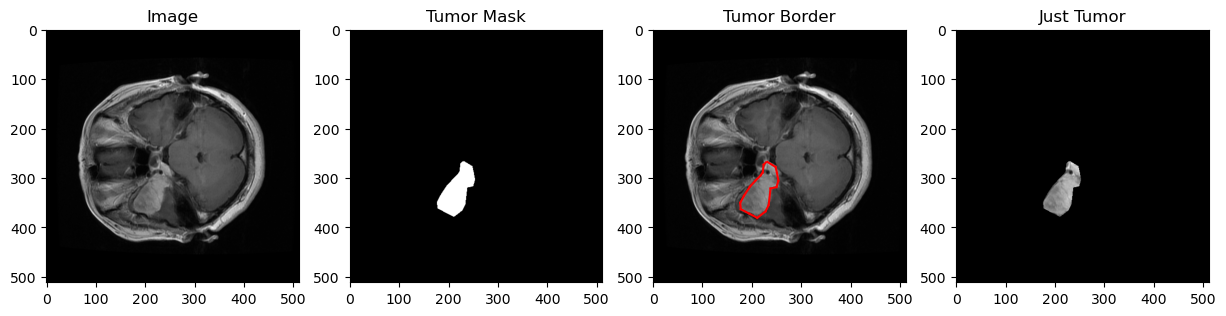

Label = 1.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 26), dtype: float64


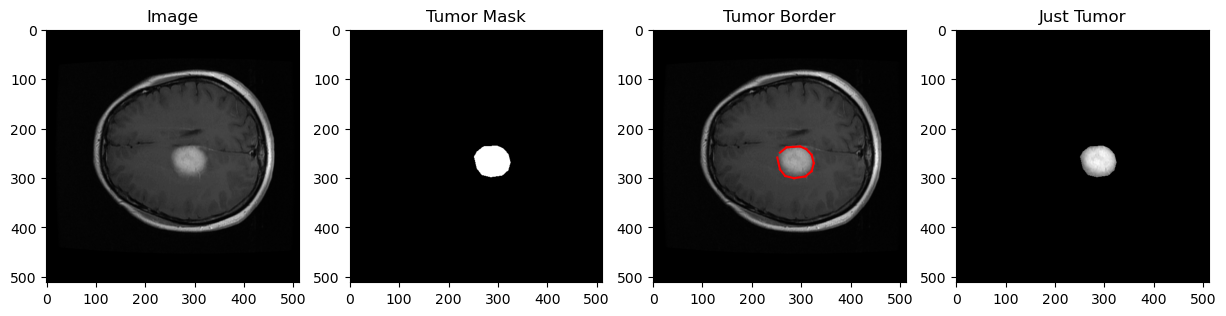

Label = 1.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 42), dtype: float64


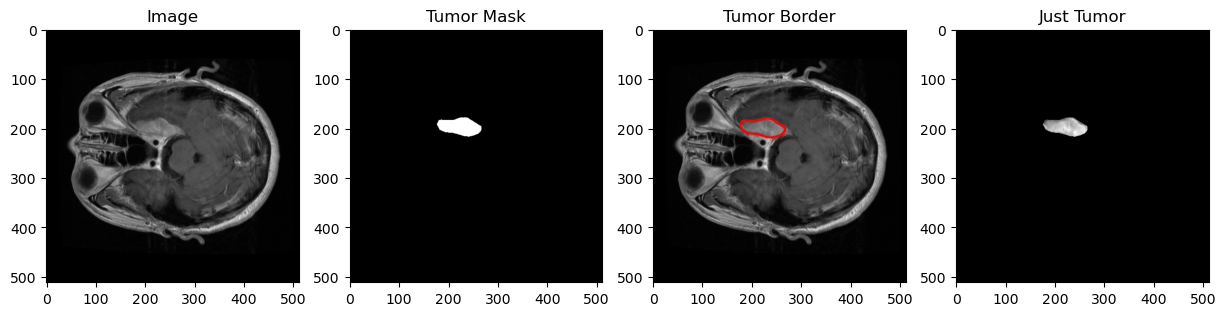

Label = 1.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 40), dtype: float64


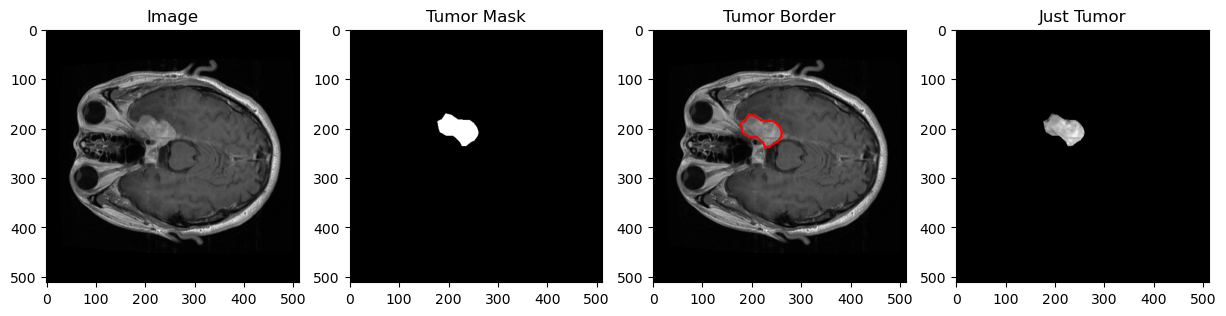

Label = 1.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 54), dtype: float64


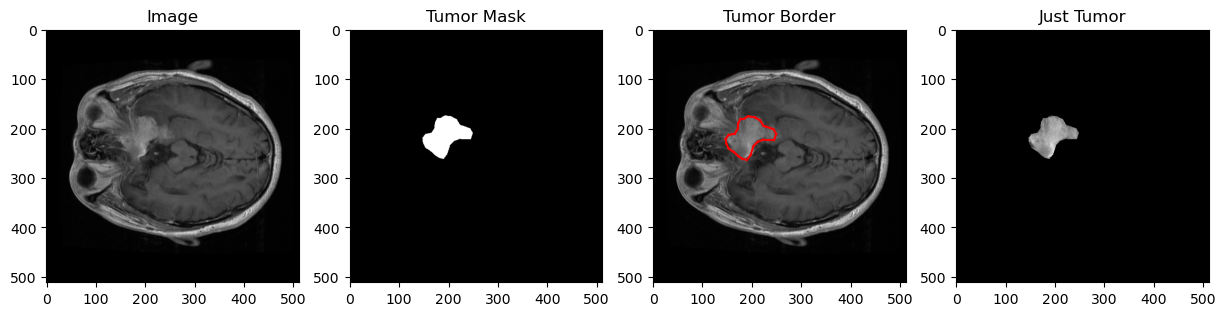

Label = 2.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 64), dtype: float64


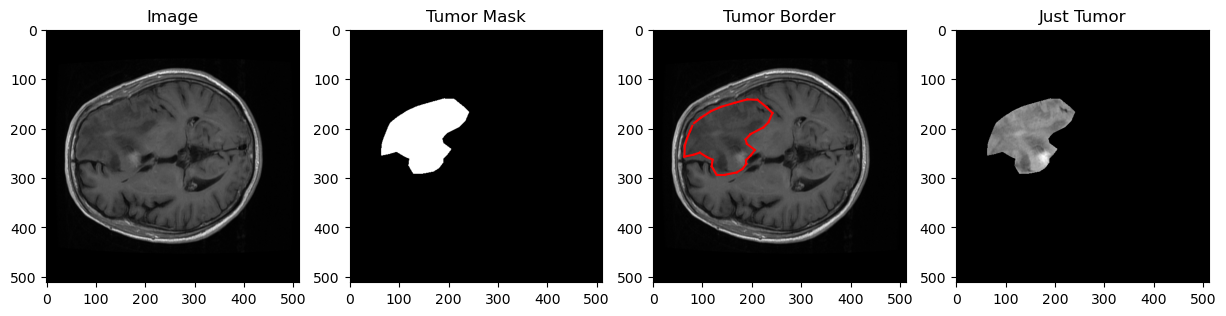

Label = 2.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 106), dtype: float64


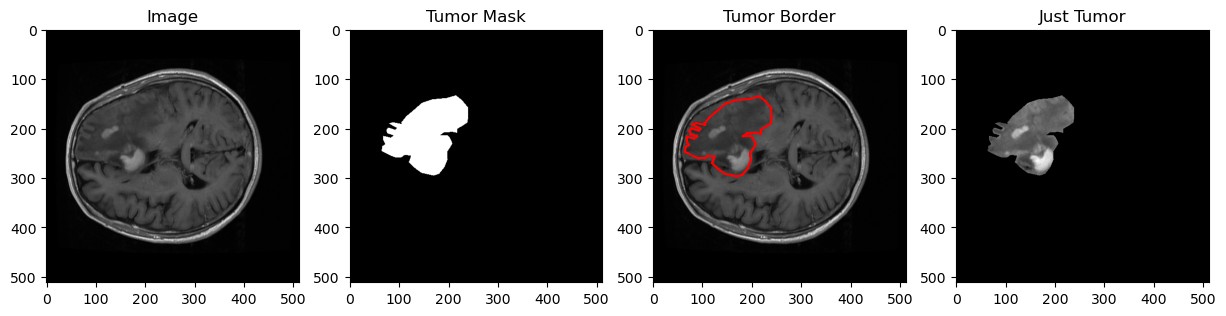

Label = 3.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 46), dtype: float64


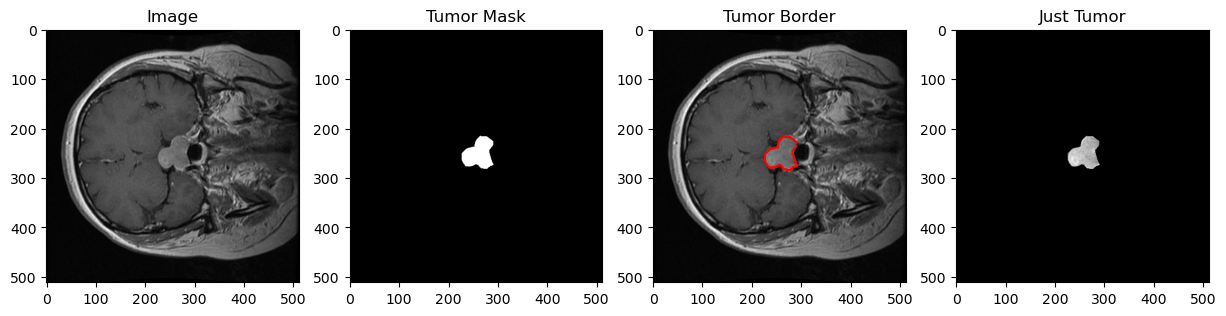

Label = 3.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 30), dtype: float64


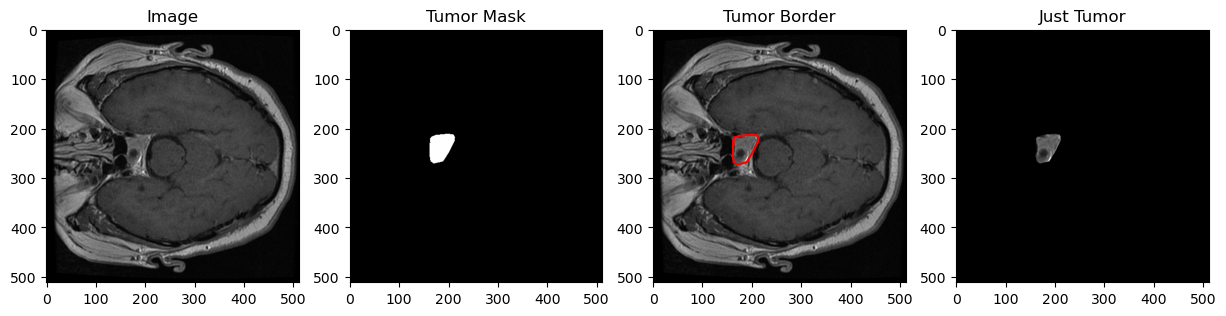

Label = 3.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 30), dtype: float64


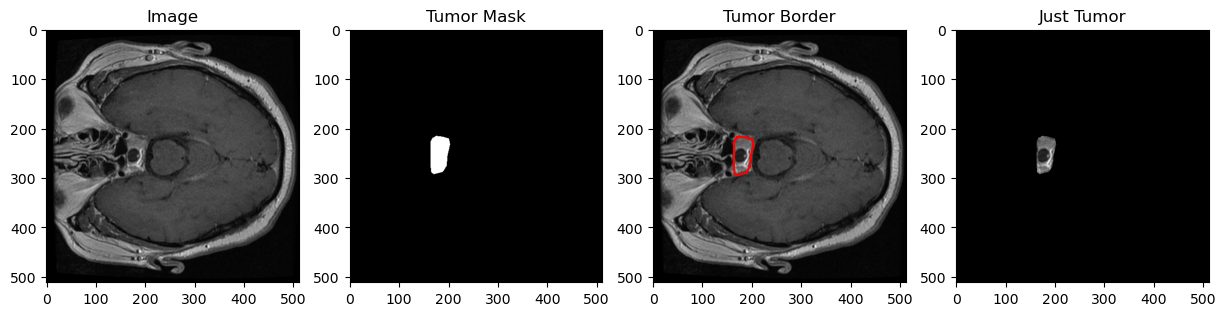

Label = 3.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 40), dtype: float64


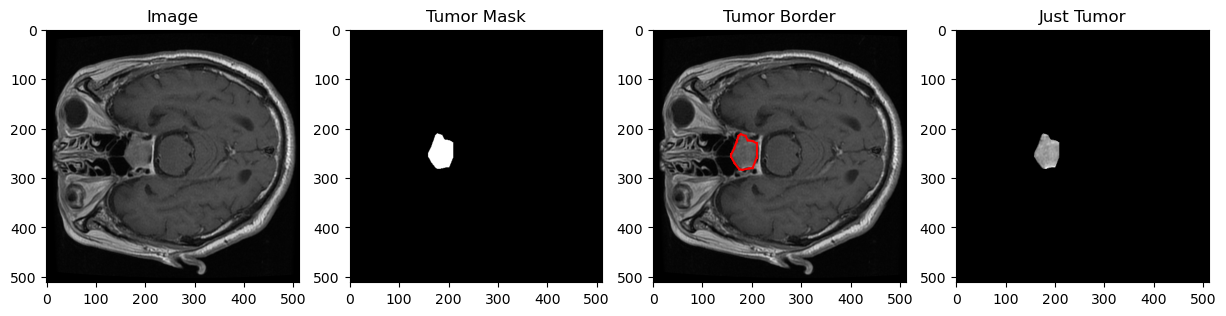

Label = 3.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 48), dtype: float64


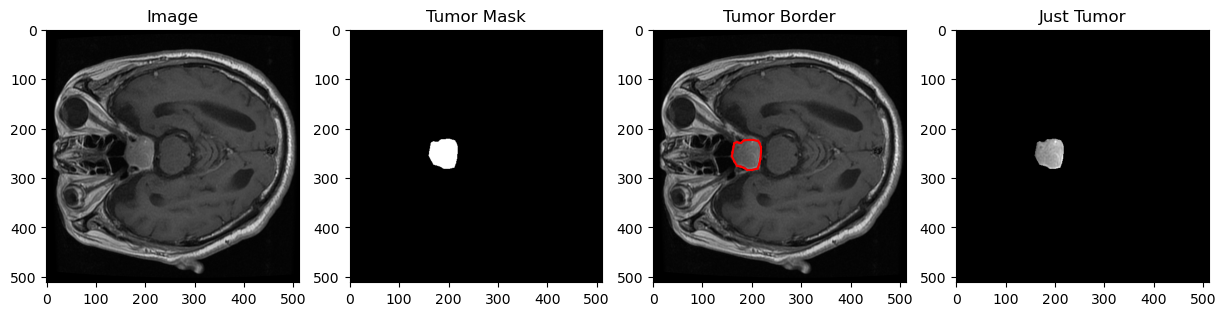

Label = 2.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 12), dtype: float64


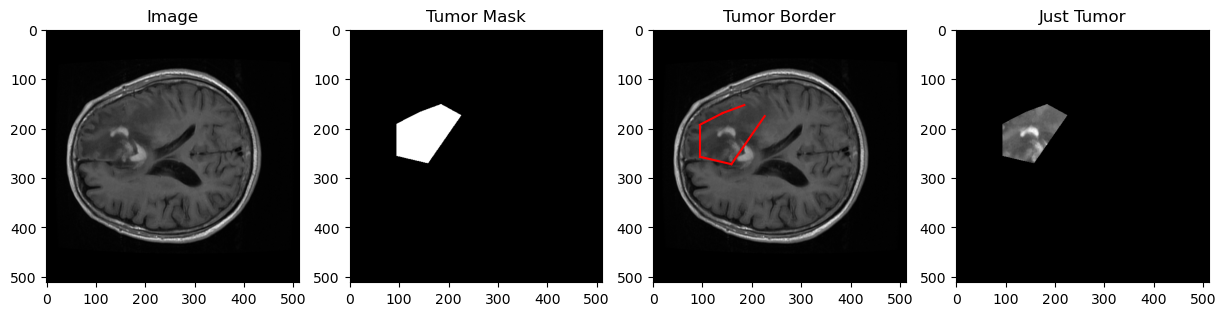

Label = 2.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 100), dtype: float64


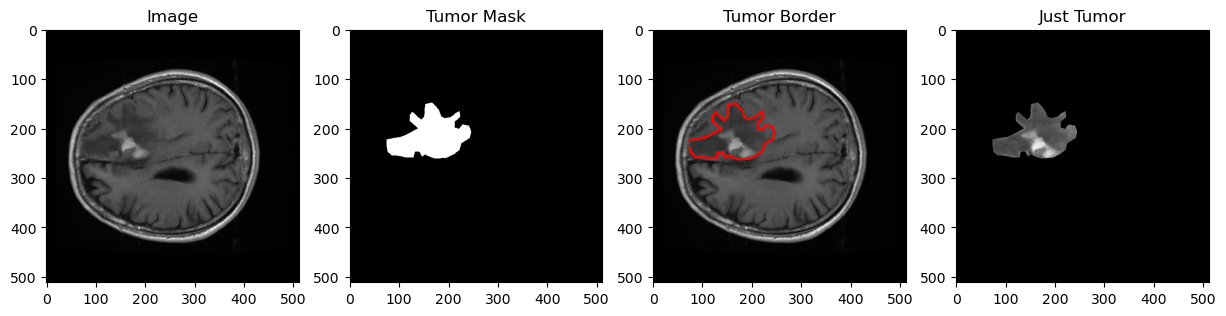

Label = 2.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 94), dtype: float64


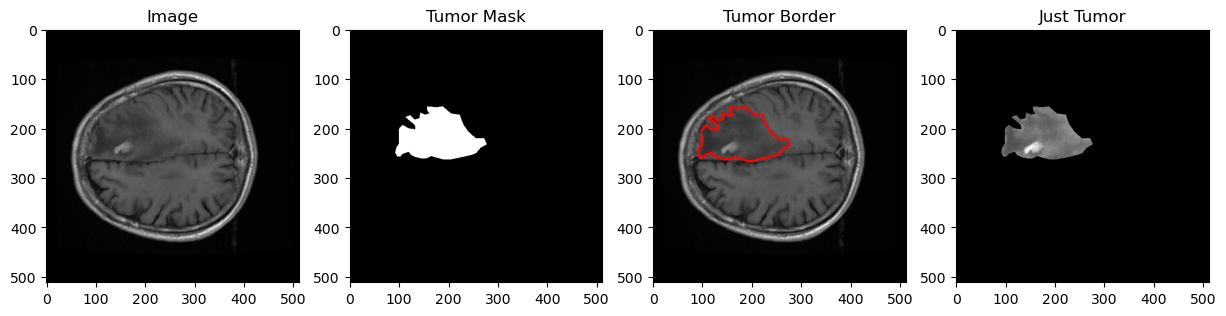

In [8]:
# Initialize a dictionary to keep track of how many elements of each label type have been printed
count = {0: 0, 1: 0, 2: 0, 3: 0}

# Loop over each key in the data dictionary
for j in range(4):
    # Loop over each dictionary in the list
    for i in range(len(data[j])):
        # Check if the label of the current dictionary is one of the keys in the count dictionary
        if data[j][i]['label'] in count:
            # Check if less than 5 elements of this label type have been printed
            if count[data[j][i]['label']] < 5:
                # Print the data
                display_data(data[j][i])
                
                # Increment the count for this label type
                count[data[j][i]['label']] += 1

<i> Data Size Analysis </i>

In [9]:
# Consolidate the data into a single list
data_list = []
for j in range(4):
    print(f'Number of samples in data[{j}]: {len(data[j])}')
    data_list += data[j]

print(f'Number of samples: {len(data_list)}')


Number of samples in data[0]: 500
Number of samples in data[1]: 766
Number of samples in data[2]: 766
Number of samples in data[3]: 766
Number of samples: 2798


# Plots

## <i> Label Distribution </i>

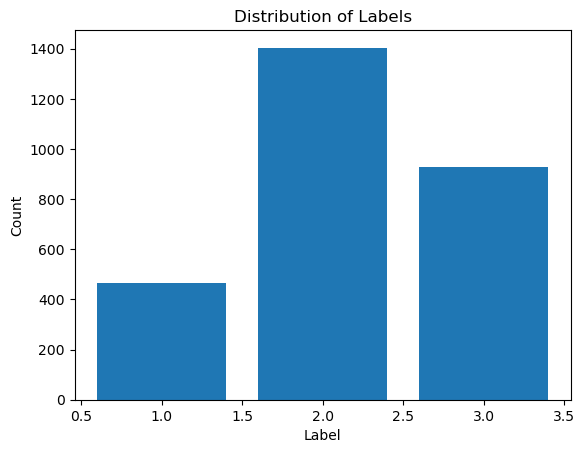

In [10]:
# plot the distribution of the labels

# Initialize a dictionary to keep track of the count of each label
label_count = {1: 0, 2: 0, 3: 0}

# Loop over each dictionary in the list
for datum in data_list:
    # Increment the count for this label
    label_count[datum['label']] += 1

# Plot the distribution of the labels
fig, ax = plt.subplots()
ax.bar(label_count.keys(), label_count.values())
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('Distribution of Labels')
plt.show()


## <i> Average brightness of image by label </i>

C:\Users\Kirin\AppData\Local\Temp\ipykernel_164808\1841107696.py:12: RuntimeWarning: overflow encountered in scalar add
  label_sum[datum['label']] += np.sum(datum['image'])


Average pixel value for label 1: 6.741940447079238
Average pixel value for label 2: -4.989871228862013
Average pixel value for label 3: 4.469589665682301


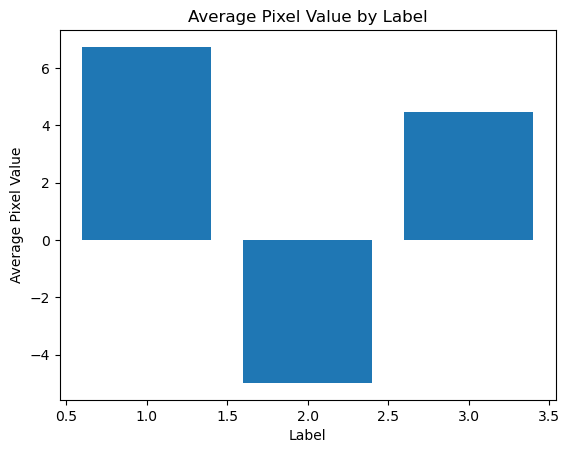

In [11]:
# print the average pixel values of images by class

# Initialize a dictionary to keep track of the sum of pixel values for each label
label_sum = {1: 0, 2: 0, 3: 0}

# Initialize a dictionary to keep track of the count of pixels for each label
label_count = {1: 0, 2: 0, 3: 0}

# Loop over each dictionary in the list
for datum in data_list:
    # Increment the sum of pixel values for this label
    label_sum[datum['label']] += np.sum(datum['image'])
    
    # Increment the count of pixels for this label
    label_count[datum['label']] += np.prod(datum['image'].shape)

# Calculate the average pixel values for each label
label_avg = {label: label_sum[label] / label_count[label] for label in label_sum}

# Print the average pixel values for each label
for label in label_avg:
    print(f'Average pixel value for label {label}: {label_avg[label]}')

# Plot the average pixel values for each label
fig, ax = plt.subplots()
ax.bar(label_avg.keys(), label_avg.values())
ax.set_xlabel('Label')
ax.set_ylabel('Average Pixel Value')
ax.set_title('Average Pixel Value by Label')
plt.show()


## <i> Average tumor brightness and size by label </i>

C:\Users\Kirin\AppData\Local\Temp\ipykernel_164808\3463097465.py:15: RuntimeWarning: overflow encountered in scalar add
  label_sum[datum['label']] += np.sum(datum['image'] * datum['tumorMask'])


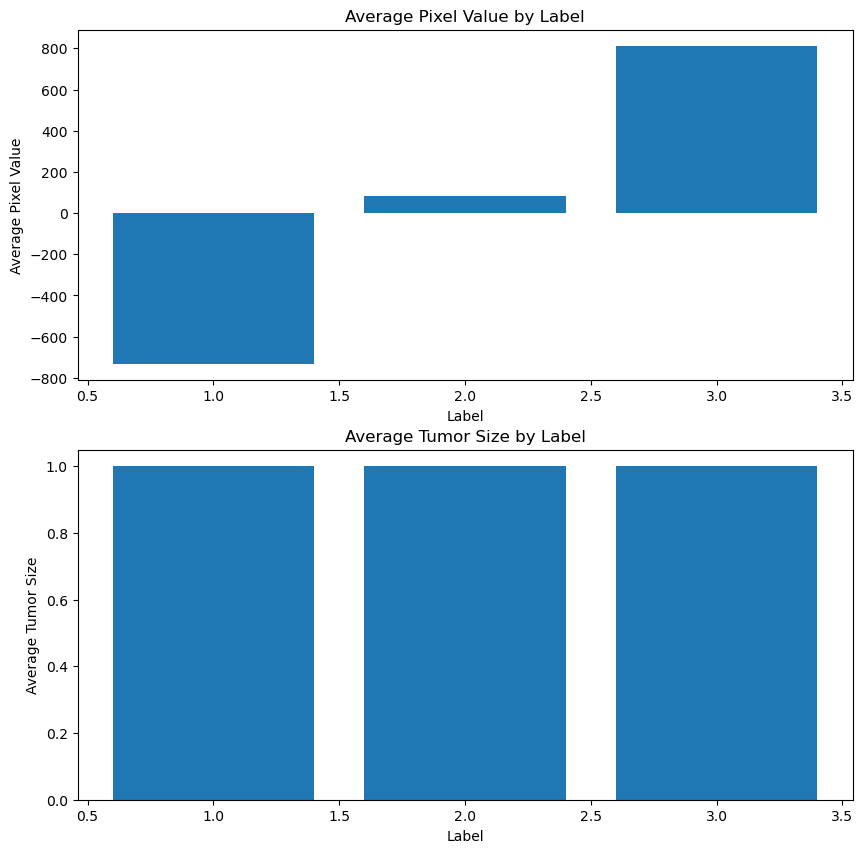

In [12]:
# Average 'Just Tumor' pixel values and tumor sizes by class. Tumor sizes are measured in terms of the number of pixels in the tumor mask.

# Initialize a dictionary to keep track of the sum of pixel values for each label
label_sum = {1: 0, 2: 0, 3: 0}

# Initialize a dictionary to keep track of the count of pixels for each label
label_count = {1: 0, 2: 0, 3: 0}

# Initialize a dictionary to keep track of the sum of tumor sizes for each label
tumor_size_sum = {1: 0, 2: 0, 3: 0}

# Loop over each dictionary in the list
for datum in data_list:
    # Increment the sum of pixel values for this label
    label_sum[datum['label']] += np.sum(datum['image'] * datum['tumorMask'])
    
    # Increment the count of pixels for this label
    label_count[datum['label']] += np.sum(datum['tumorMask'])
    
    # Increment the sum of tumor sizes for this label
    tumor_size_sum[datum['label']] += np.sum(datum['tumorMask'])

# Calculate the average pixel values for each label
label_avg = {label: label_sum[label] / label_count[label] for label in label_sum}

# Calculate the average tumor size for each label
tumor_size_avg = {label: tumor_size_sum[label] / label_count[label] for label in tumor_size_sum}

# PLot all the data
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].bar(label_avg.keys(), label_avg.values())
ax[0].set_xlabel('Label')
ax[0].set_ylabel('Average Pixel Value')
ax[0].set_title('Average Pixel Value by Label')
ax[1].bar(tumor_size_avg.keys(), tumor_size_avg.values())
ax[1].set_xlabel('Label')
ax[1].set_ylabel('Average Tumor Size')
ax[1].set_title('Average Tumor Size by Label')
plt.show()


## <i> Max data point attributes </i>

In [13]:
# print the max values of each image, tumorMask, and tumorBorder
max_image = 0
max_tumorMask = 0
max_tumorBorder = 0
for i in range(len(data_list)):
    max_image = max(max_image, data_list[i]['image'].max())
    max_tumorMask = max(max_tumorMask, data_list[i]['tumorMask'].max())
    max_tumorBorder = max(max_tumorBorder, data_list[i]['tumorBorder'].max())

print(f'Max image value: {max_image}')
print(f'Max tumor mask value: {max_tumorMask}')
print(f'Max tumor border value: {max_tumorBorder}')

Max image value: 12728
Max tumor mask value: 1
Max tumor border value: 470.0766550522648


<div style="font-size:20px">

> **Note:** The data is stored in 16-bit format in order to preserve the detail of the scans. This explains the extremely large discrepancy in the brightness values. It also explains the low average values as the distribution is skewed towards the lower end.

</div>

<h1 style="font-size:50px;">Data Preprocessing</h1>

#  <i>Data Normailzation</i>

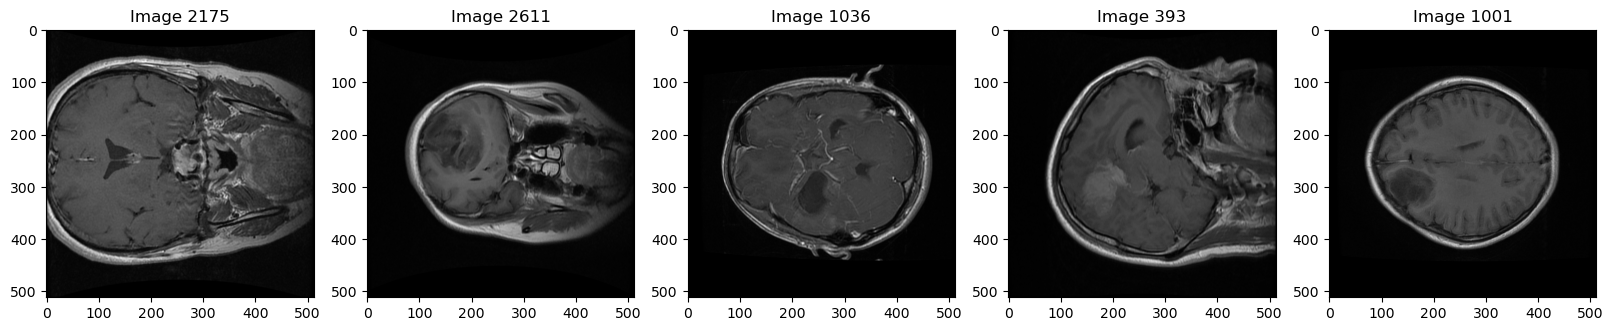

In [14]:
# Normalize the images and bounding box coordinates
for i in range(len(data_list)):
    data_list[i]['image'] = data_list[i]['image'] / max_image  # Normalize the image
    data_list[i]['tumorBorder'] = data_list[i]['tumorBorder'] / 512  # Assuming the image size is 512x512, which we have confirmed it to be

# Display the 5 random images
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    idx = np.random.randint(len(data_list))
    ax[i].imshow(data_list[idx]['image'], cmap='gray')
    ax[i].set_title(f'Image {idx}')
plt.show()



In [15]:
# print the max values of each image, tumorMask, and tumorBorder to confirm that they have been normalized
max_image = 0
max_tumorMask = 0
max_tumorBorder = 0
for i in range(len(data_list)):
    max_image = max(max_image, data_list[i]['image'].max())
    max_tumorMask = max(max_tumorMask, data_list[i]['tumorMask'].max())
    max_tumorBorder = max(max_tumorBorder, data_list[i]['tumorBorder'].max())

print(f'Max image value: {max_image}')
print(f'Max tumor mask value: {max_tumorMask}')
print(f'Max tumor border value: {max_tumorBorder}')

Max image value: 1.0
Max tumor mask value: 1
Max tumor border value: 0.9181184668989547


In [16]:
# print the raw array of an image, tumorMask, and tumorBorder

print(f'Image: {data_list[0]["image"]}')
print(f'Tumor Mask: {data_list[0]["tumorMask"]}')
print(f'Tumor Border: {data_list[0]["tumorBorder"]}')


Image: [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 7.8566939e-05 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
Tumor Mask: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Tumor Border: [[0.52268603 0.45190563 0.54264973 0.4845735  0.56624319 0.49001815
  0.59709619 0.49546279 0.62250454 0.48820327 0.62794918 0.4646098
  0.69328494 0.45735027 0.71869328 0.4446461  0.74410163 0.41197822
  0.7277677  0.38112523 0.70961887 0.34664247 0.68421053 0.34482759
  0.6569873 

# <i> Train, validation, test split</i>

In [17]:
# Split the data into training, validation, and test sets

# Set the random seed
np.random.seed(0)

# Shuffle the data
np.random.shuffle(data_list)

# Split the data into training, validation, and test sets
n = len(data_list)
train_data = data_list[:int(0.6*n)]
val_data = data_list[int(0.6*n):int(0.8*n)]
test_data = data_list[int(0.8*n):]

print(f'Number of training samples: {len(train_data)}')
print(f'Number of validation samples: {len(val_data)}')
print(f'Number of test samples: {len(test_data)}')



Number of training samples: 1678
Number of validation samples: 560
Number of test samples: 560


# <i>Data Augmentation</i>

In [18]:
import cv2
import random

In [19]:
def augment_data(image):
    # Original image
    original_image = image

    # Horizontally flipped image
    flipped_image = cv2.flip(original_image, 1)  # 1 means flipping around y-axis

    # Mirrored image
    mirrored_image = original_image[:, ::-1]

    # Rotated image
    rotated_image = cv2.rotate(original_image, cv2.ROTATE_90_CLOCKWISE)

    return [original_image, flipped_image, mirrored_image, rotated_image]

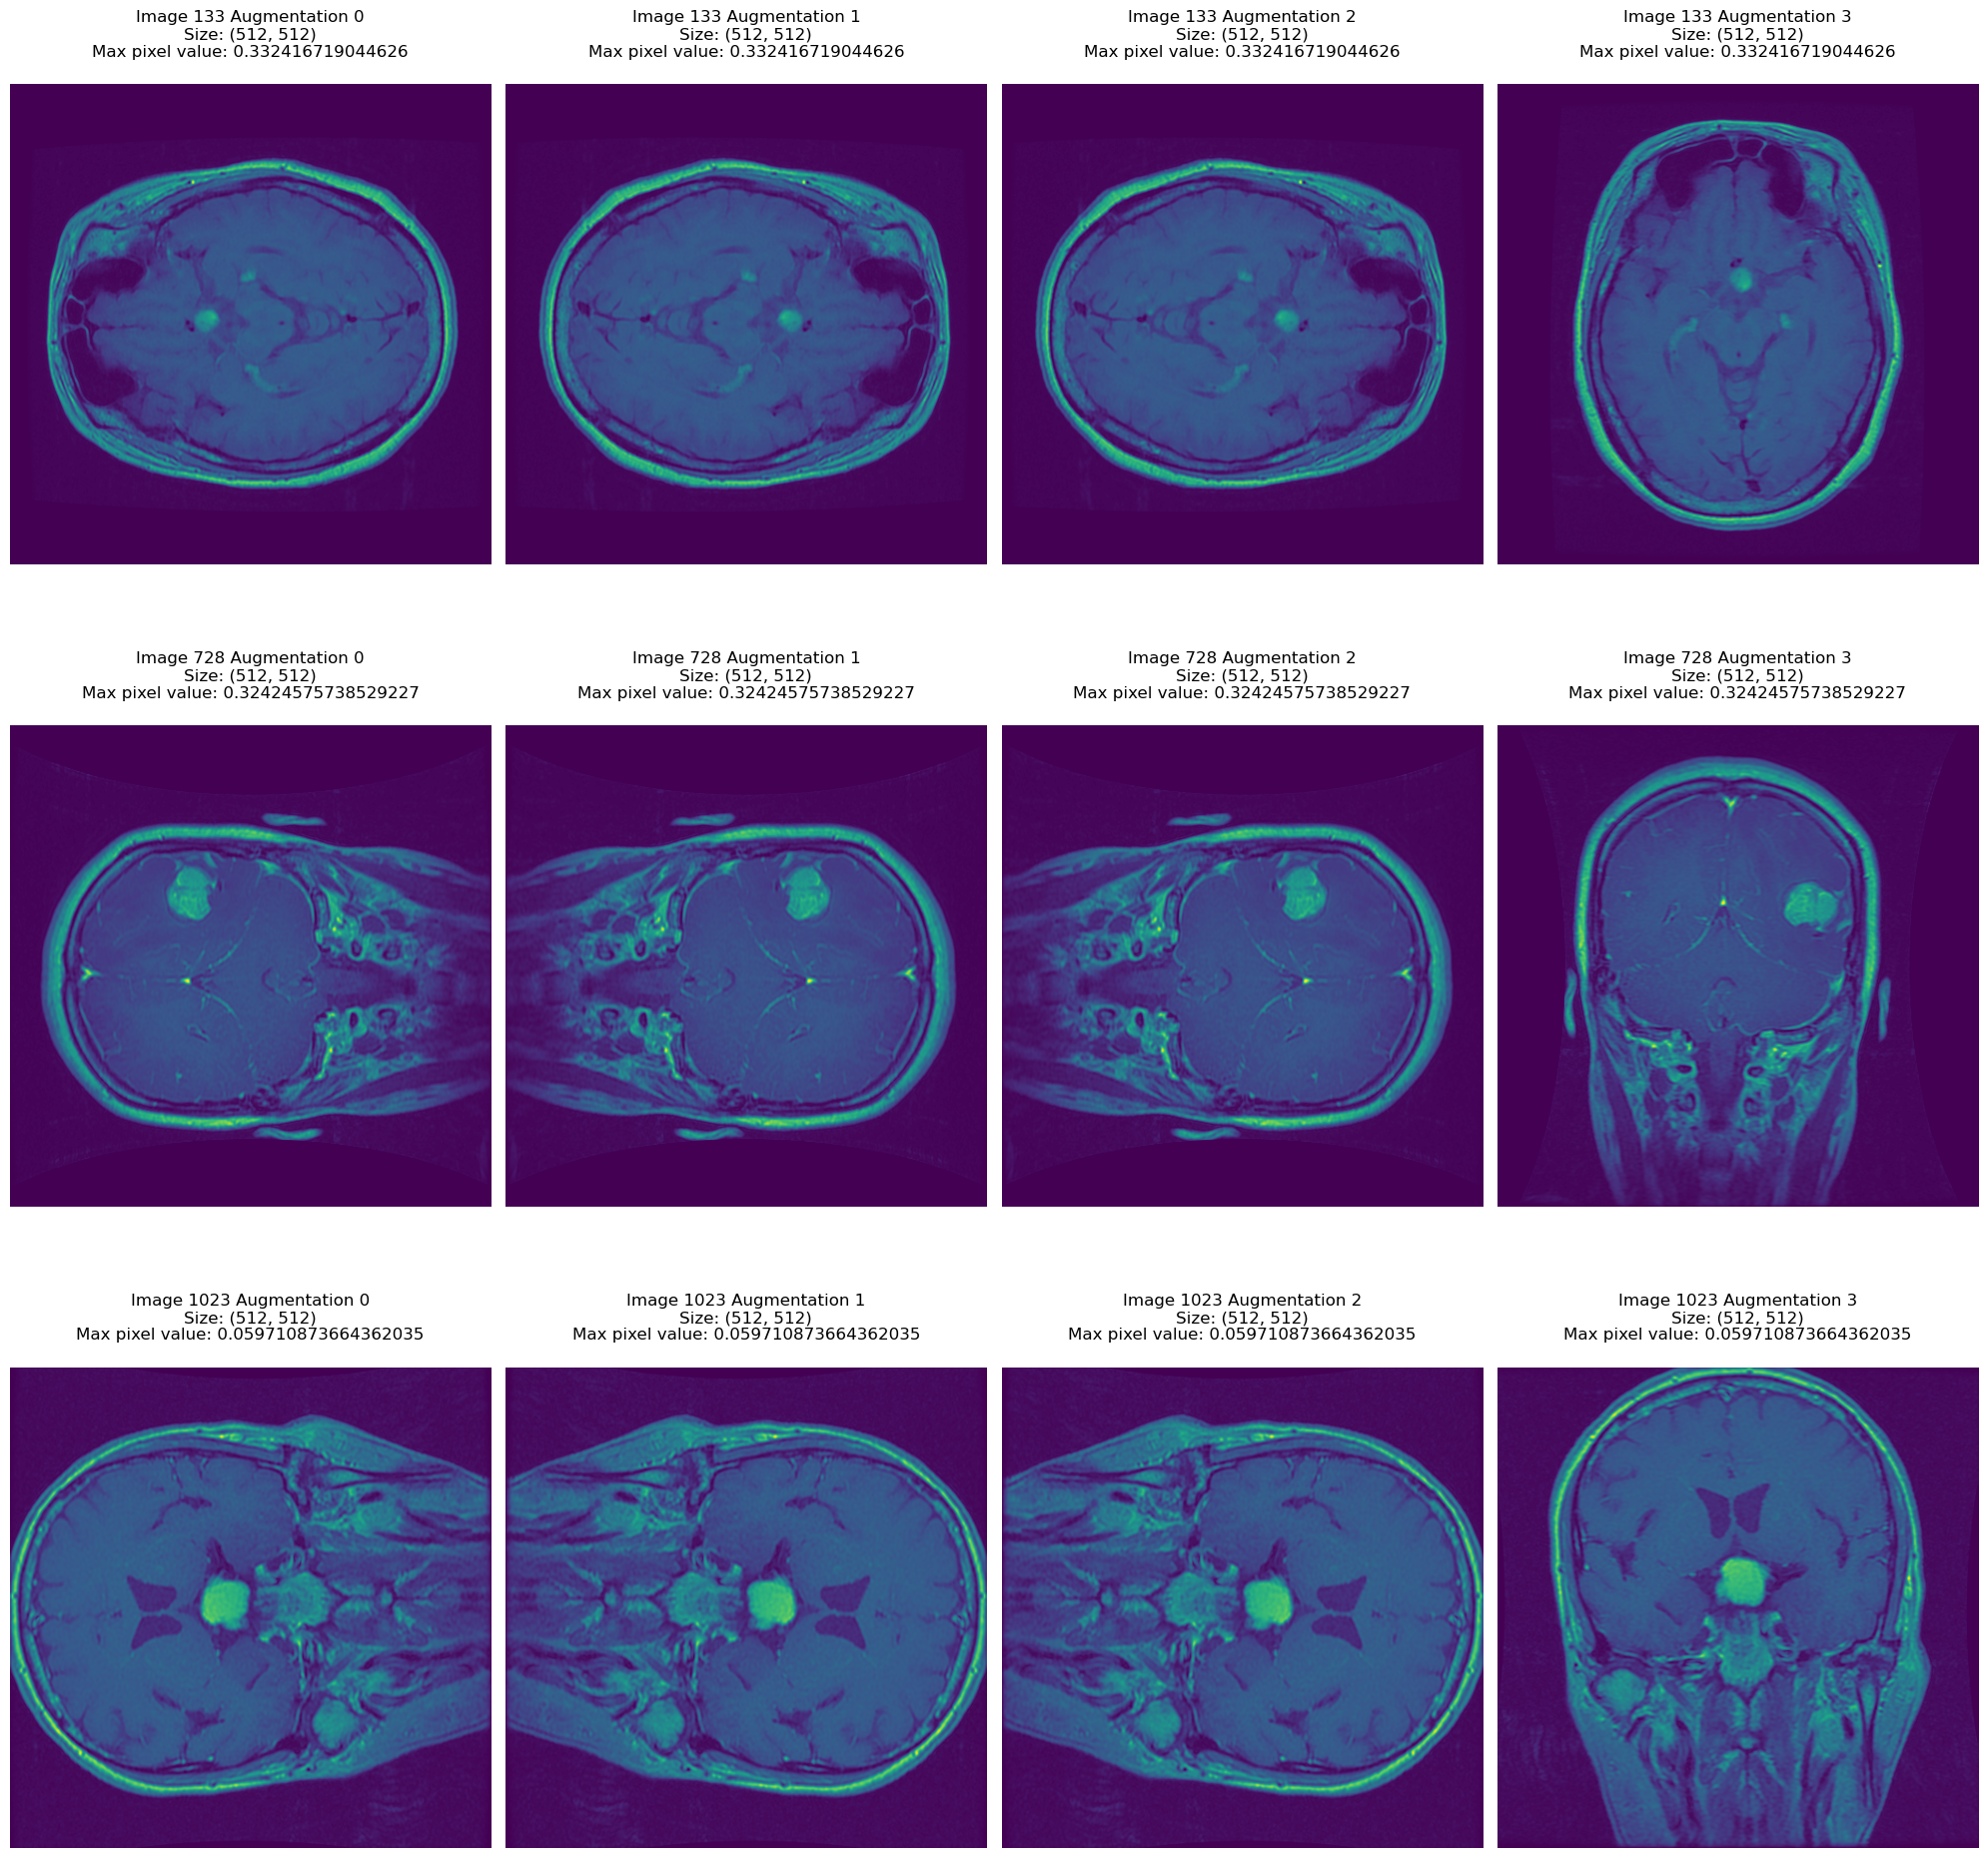

In [20]:
# print 5 random images, their sizes, max pixel values and their augmentations

fig, ax = plt.subplots(3, 4, figsize=(20, 20))
for i in range(3):
    idx = np.random.randint(len(train_data))
    image = train_data[idx]['image']
    augmentations = augment_data(image)
    for j in range(4):
        ax[i, j].imshow(augmentations[j], cmap='viridis')  # Use the 'viridis' colormap
        ax[i, j].axis('off')  # Remove the axis
        title = (f'Image {idx} Augmentation {j}\n'
                 f'Size: {augmentations[j].shape}\n'
                 f'Max pixel value: {augmentations[j].max()}')
        ax[i, j].set_title(title, pad=20, fontsize=12)  # Add padding and increase font size
plt.tight_layout()
plt.show()

# <i> Data generation</i>

<div style="font-size:20px">

The `DataGenerator` class in the provided code is a custom Python generator used for loading and preprocessing batches of image data on-the-fly during the training of a machine learning model. It inherits from Keras' `Sequence` class, ensuring safe multi-processing.

Key features include:

- **Batch Size Adjustment:** The batch size is divided by 4 to account for data augmentations.
- **Data Augmentation:** If provided, a random augmentation function is applied to each image in the batch.
- **Label Adjustment:** 1 is subtracted from each label to match the zero-based indexing of Python.
- **Shape Validation:** Images not matching the expected shape (512, 512) are skipped.
- **Batch Validation:** Batches with mismatched shapes or empty batches are skipped, raising an `IndexError`.

</div>

In [21]:
from keras.utils import Sequence
import random

> **Note:** Since the labels are $[1.0, 2.0, 3.0]$, we have converted them to $[0, 1, 2]$ in order to comply with the requirements of the loss function.

In [22]:
import numpy as np
import random
from keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, data, batch_size, augmentations=None):
        self.data = data
        self.batch_size = batch_size // 4  # Adjust the batch size
        self.augmentations = augmentations if augmentations else []

    def __len__(self):
        # Ensure the total length accounts for the augmentations
        return int(np.ceil(len(self.data) / self.batch_size) * 4)

    def __getitem__(self, idx):
        # Calculate the start and end indices of the batch
        actual_idx = idx % int(np.ceil(len(self.data) / self.batch_size))
        start_idx = actual_idx * self.batch_size
        end_idx = min(start_idx + self.batch_size, len(self.data))

        batch = self.data[start_idx:end_idx]

        if len(batch) == 0:  # Skip empty batches
            raise IndexError("Empty batch encountered")

        batch_images = []
        batch_labels = []

        for item in batch:
            image = item['image']
            label = item['label'] - 1  # Subtract 1 from the label

            # Apply a random augmentation function
            if self.augmentations:
                augment_func = random.choice(self.augmentations)
                images = augment_func(image)
            else:
                images = [image]

            for img in images:
                if img.shape == (512, 512):  # Ensure the image shape is correct
                    batch_images.append(img)
                    batch_labels.append(label)
                else:
                    print(f"Skipping image with shape {img.shape}")

        # Convert lists to numpy arrays
        if batch_images and batch_labels:  # Check if batch lists are not empty
            batch_images = np.expand_dims(np.array(batch_images), axis=-1)  # Adding channel dimension
            batch_labels = np.array(batch_labels)
            if batch_images.shape == (len(batch_labels), 512, 512, 1):  # Ensure shapes match
                # Debugging: Print the shapes of the arrays
                print(f'Batch {idx} - Images shape: {batch_images.shape}, Labels shape: {batch_labels.shape}')
                return batch_images, batch_labels
            else:
                print(f"Skipping batch due to shape mismatch: {batch_images.shape}, {batch_labels.shape}")
                raise IndexError("Shape mismatch")

        raise IndexError("Invalid batch generated")

# Initialize the data generators with debugging
train_gen = DataGenerator(train_data, batch_size=16, augmentations=[augment_data])
val_gen = DataGenerator(val_data, batch_size=16, augmentations=[augment_data])

# Print information about the first batch to debug
try:
    images, labels = train_gen[0]
    print(f'First training batch - Images shape: {images.shape}, Labels shape: {labels.shape}')
except IndexError as e:
    print(f"Error generating first training batch: {e}")

# # Train the model
# history = model.fit(train_gen, 
#                     validation_data=val_gen, 
#                     epochs=10)


Batch 0 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
First training batch - Images shape: (16, 512, 512, 1), Labels shape: (16,)


<h1 style="font-size:50px;">Convolutional Neural Network</h1>

In [23]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# Initializing a CNN model

<div style="font-size:20px">

| Model Type | Convolutional Layers | Max Pooling Layers | Dense Layers | Output Layer | Optimizer | Loss Function |
|------------|----------------------|--------------------|--------------|--------------|-----------|---------------|
| CNN        | 3                    | 2                  | 1            | Softmax      | Adam      | Sparse Categorical Cross-Entropy |

</div>

In [24]:
# Define the input layer
inputs = Input(shape=(512, 512, 1))

# Add convolutional and pooling layers
x = Conv2D(32, (3, 3), activation='relu', strides=2)(inputs)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)  # Add dropout layer
x = Conv2D(64, (3, 3), activation='relu', strides=2)(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', strides=2)(x)
x = Dropout(0.30)(x)  # Add dropout layer

# Flatten the output
x = Flatten()(x)

# Add a dense layer
x = Dense(128, activation='relu')(x)

# Define the classification output
classification_output = Dense(3, activation='softmax', name='classification')(x)

# Define the model
model = Model(inputs=inputs, outputs=classification_output)

# Compile the model with a single loss function
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 255, 255, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                        

# <i> Using the DataGenerator Class to load train and validation data </i>

In [25]:
# Reinitialize the data generators
train_gen = DataGenerator(train_data, batch_size=16, augmentations=[augment_data])
val_gen = DataGenerator(val_data, batch_size=16, augmentations=[augment_data])

print(f'Number of training batches: {len(train_gen)}')
print(f'Number of validation batches: {len(val_gen)}')

Number of training batches: 1680
Number of validation batches: 560


# </i> Visualizing the loaded data </i>

Batch 0 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Length of image array: 16
Length of label array: 16
Batch 0 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Length of validation image array: 16
Length of validation label array: 16
Batch 0 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 1 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 2 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 3 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 4 - Images shape: (16, 512, 512, 1), Labels shape: (16,)


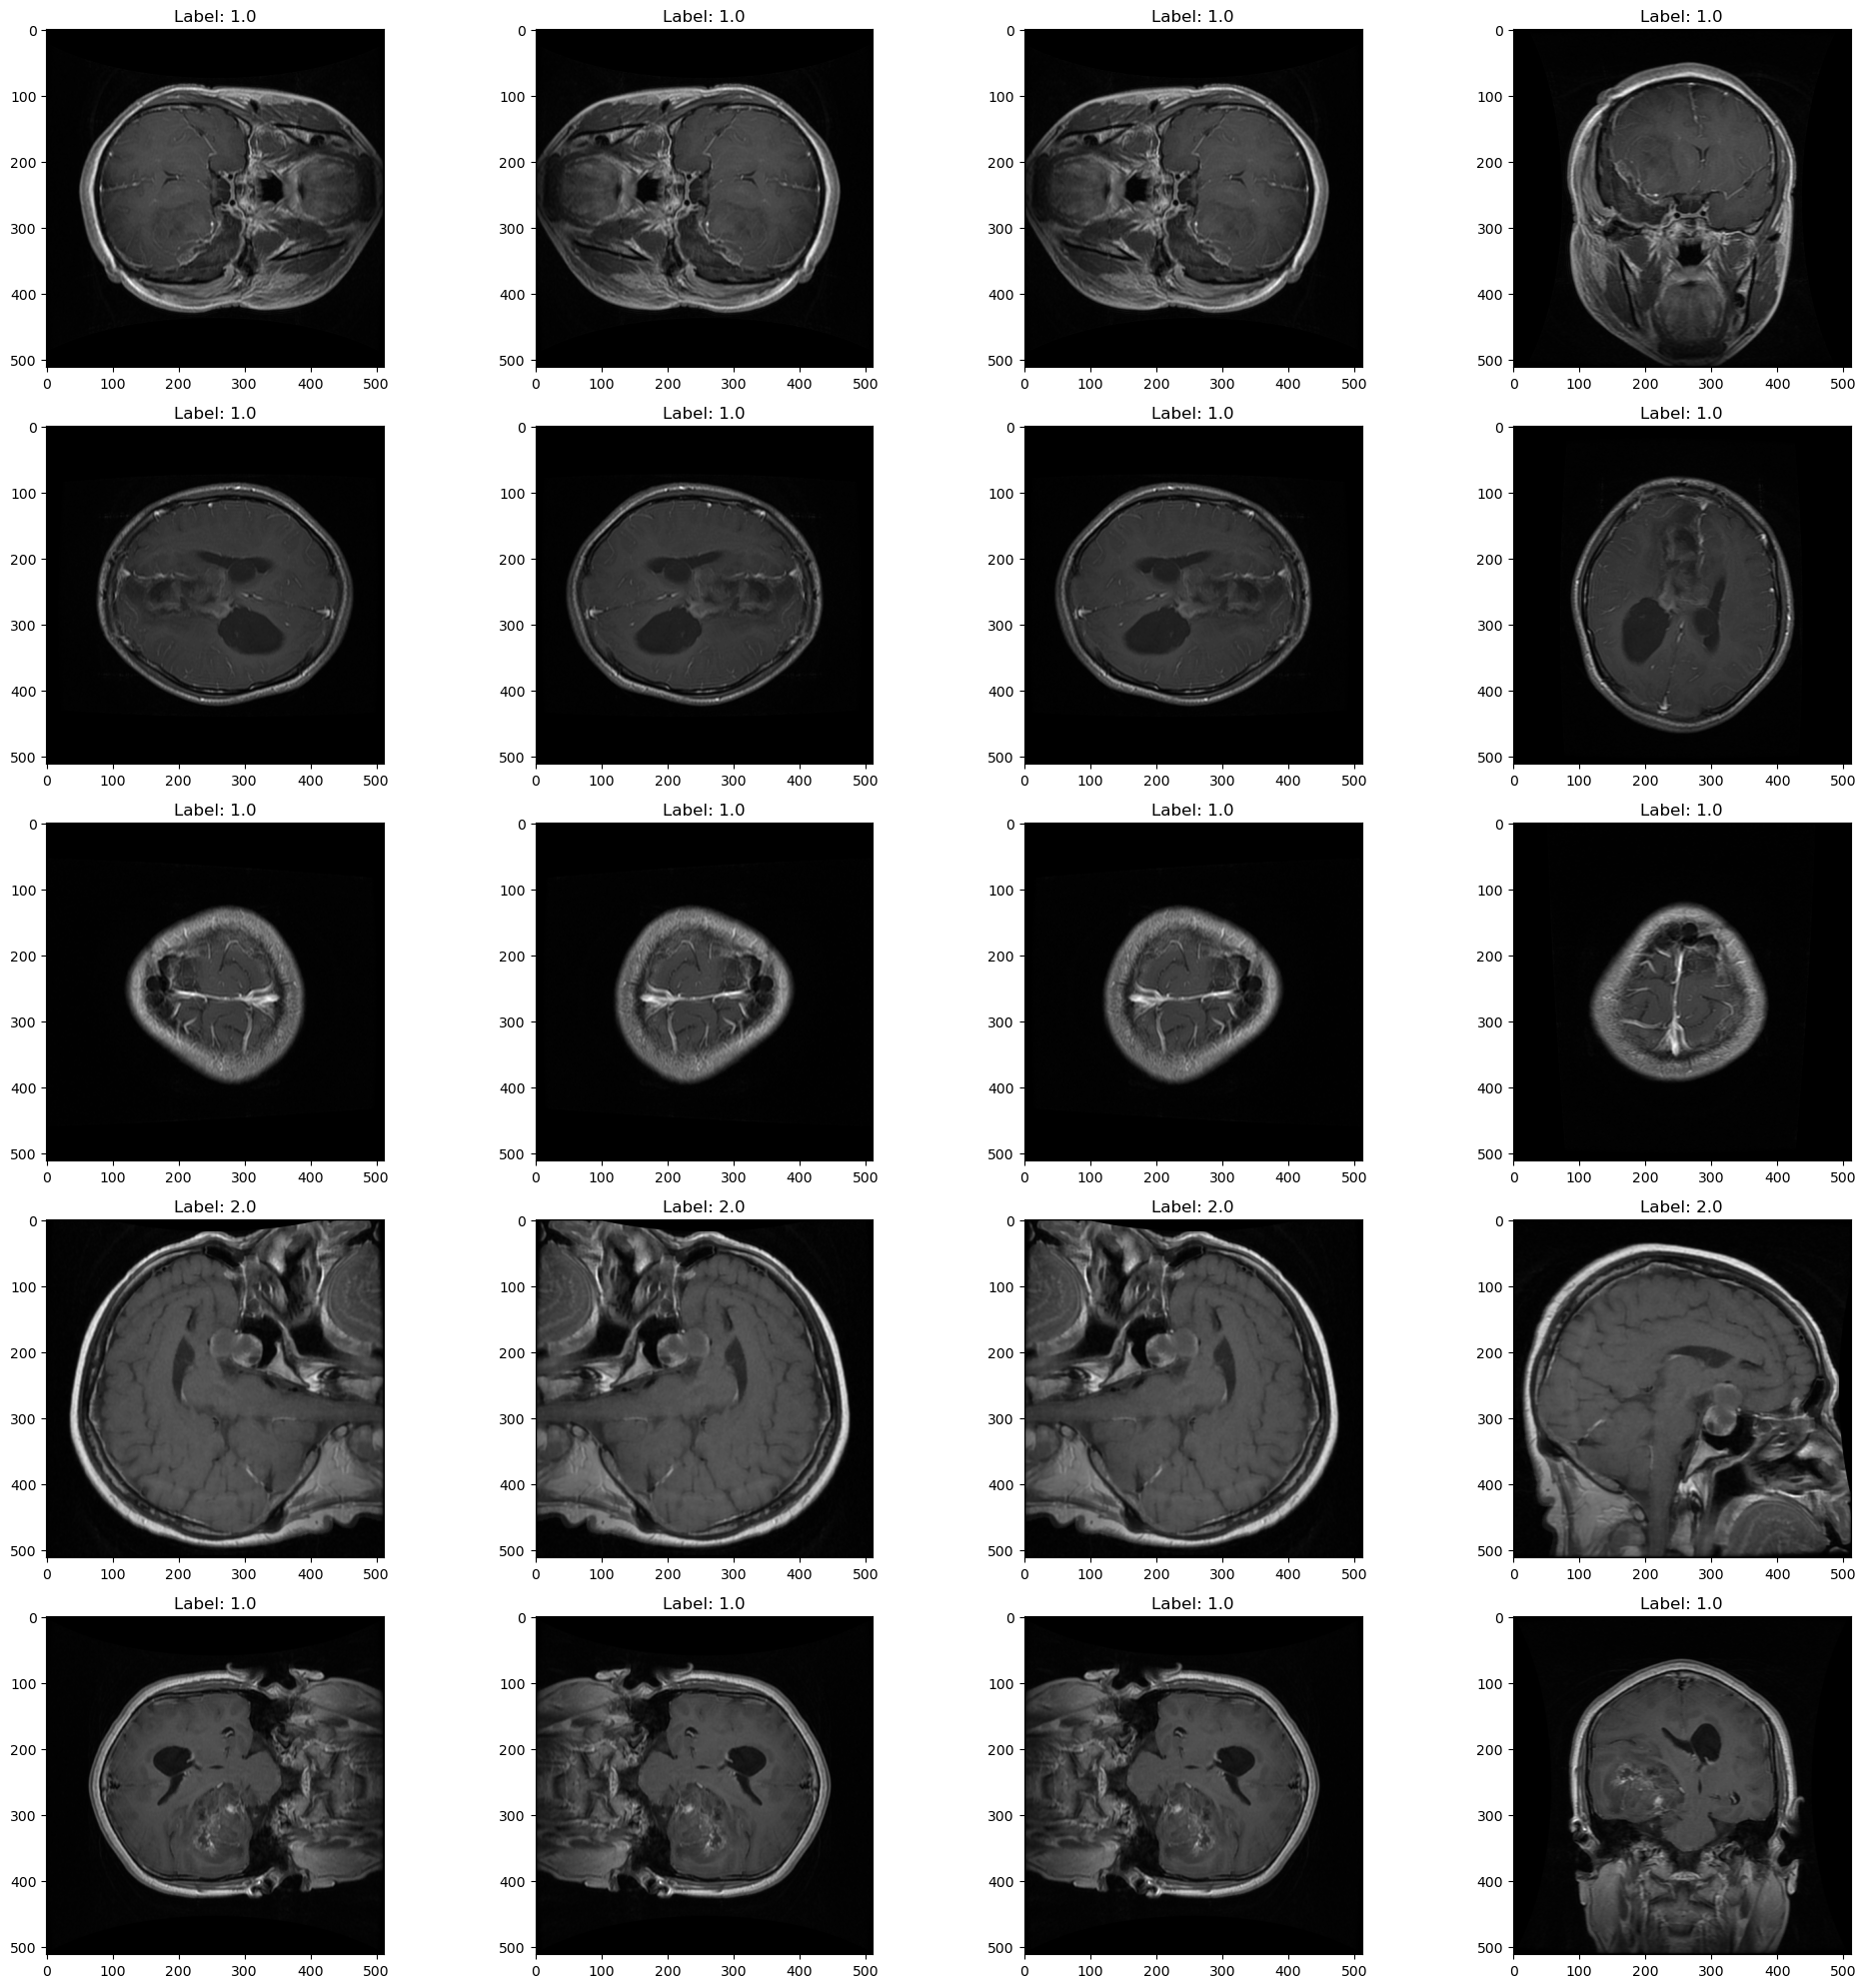

Batch 0 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 1 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 2 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 3 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 4 - Images shape: (16, 512, 512, 1), Labels shape: (16,)


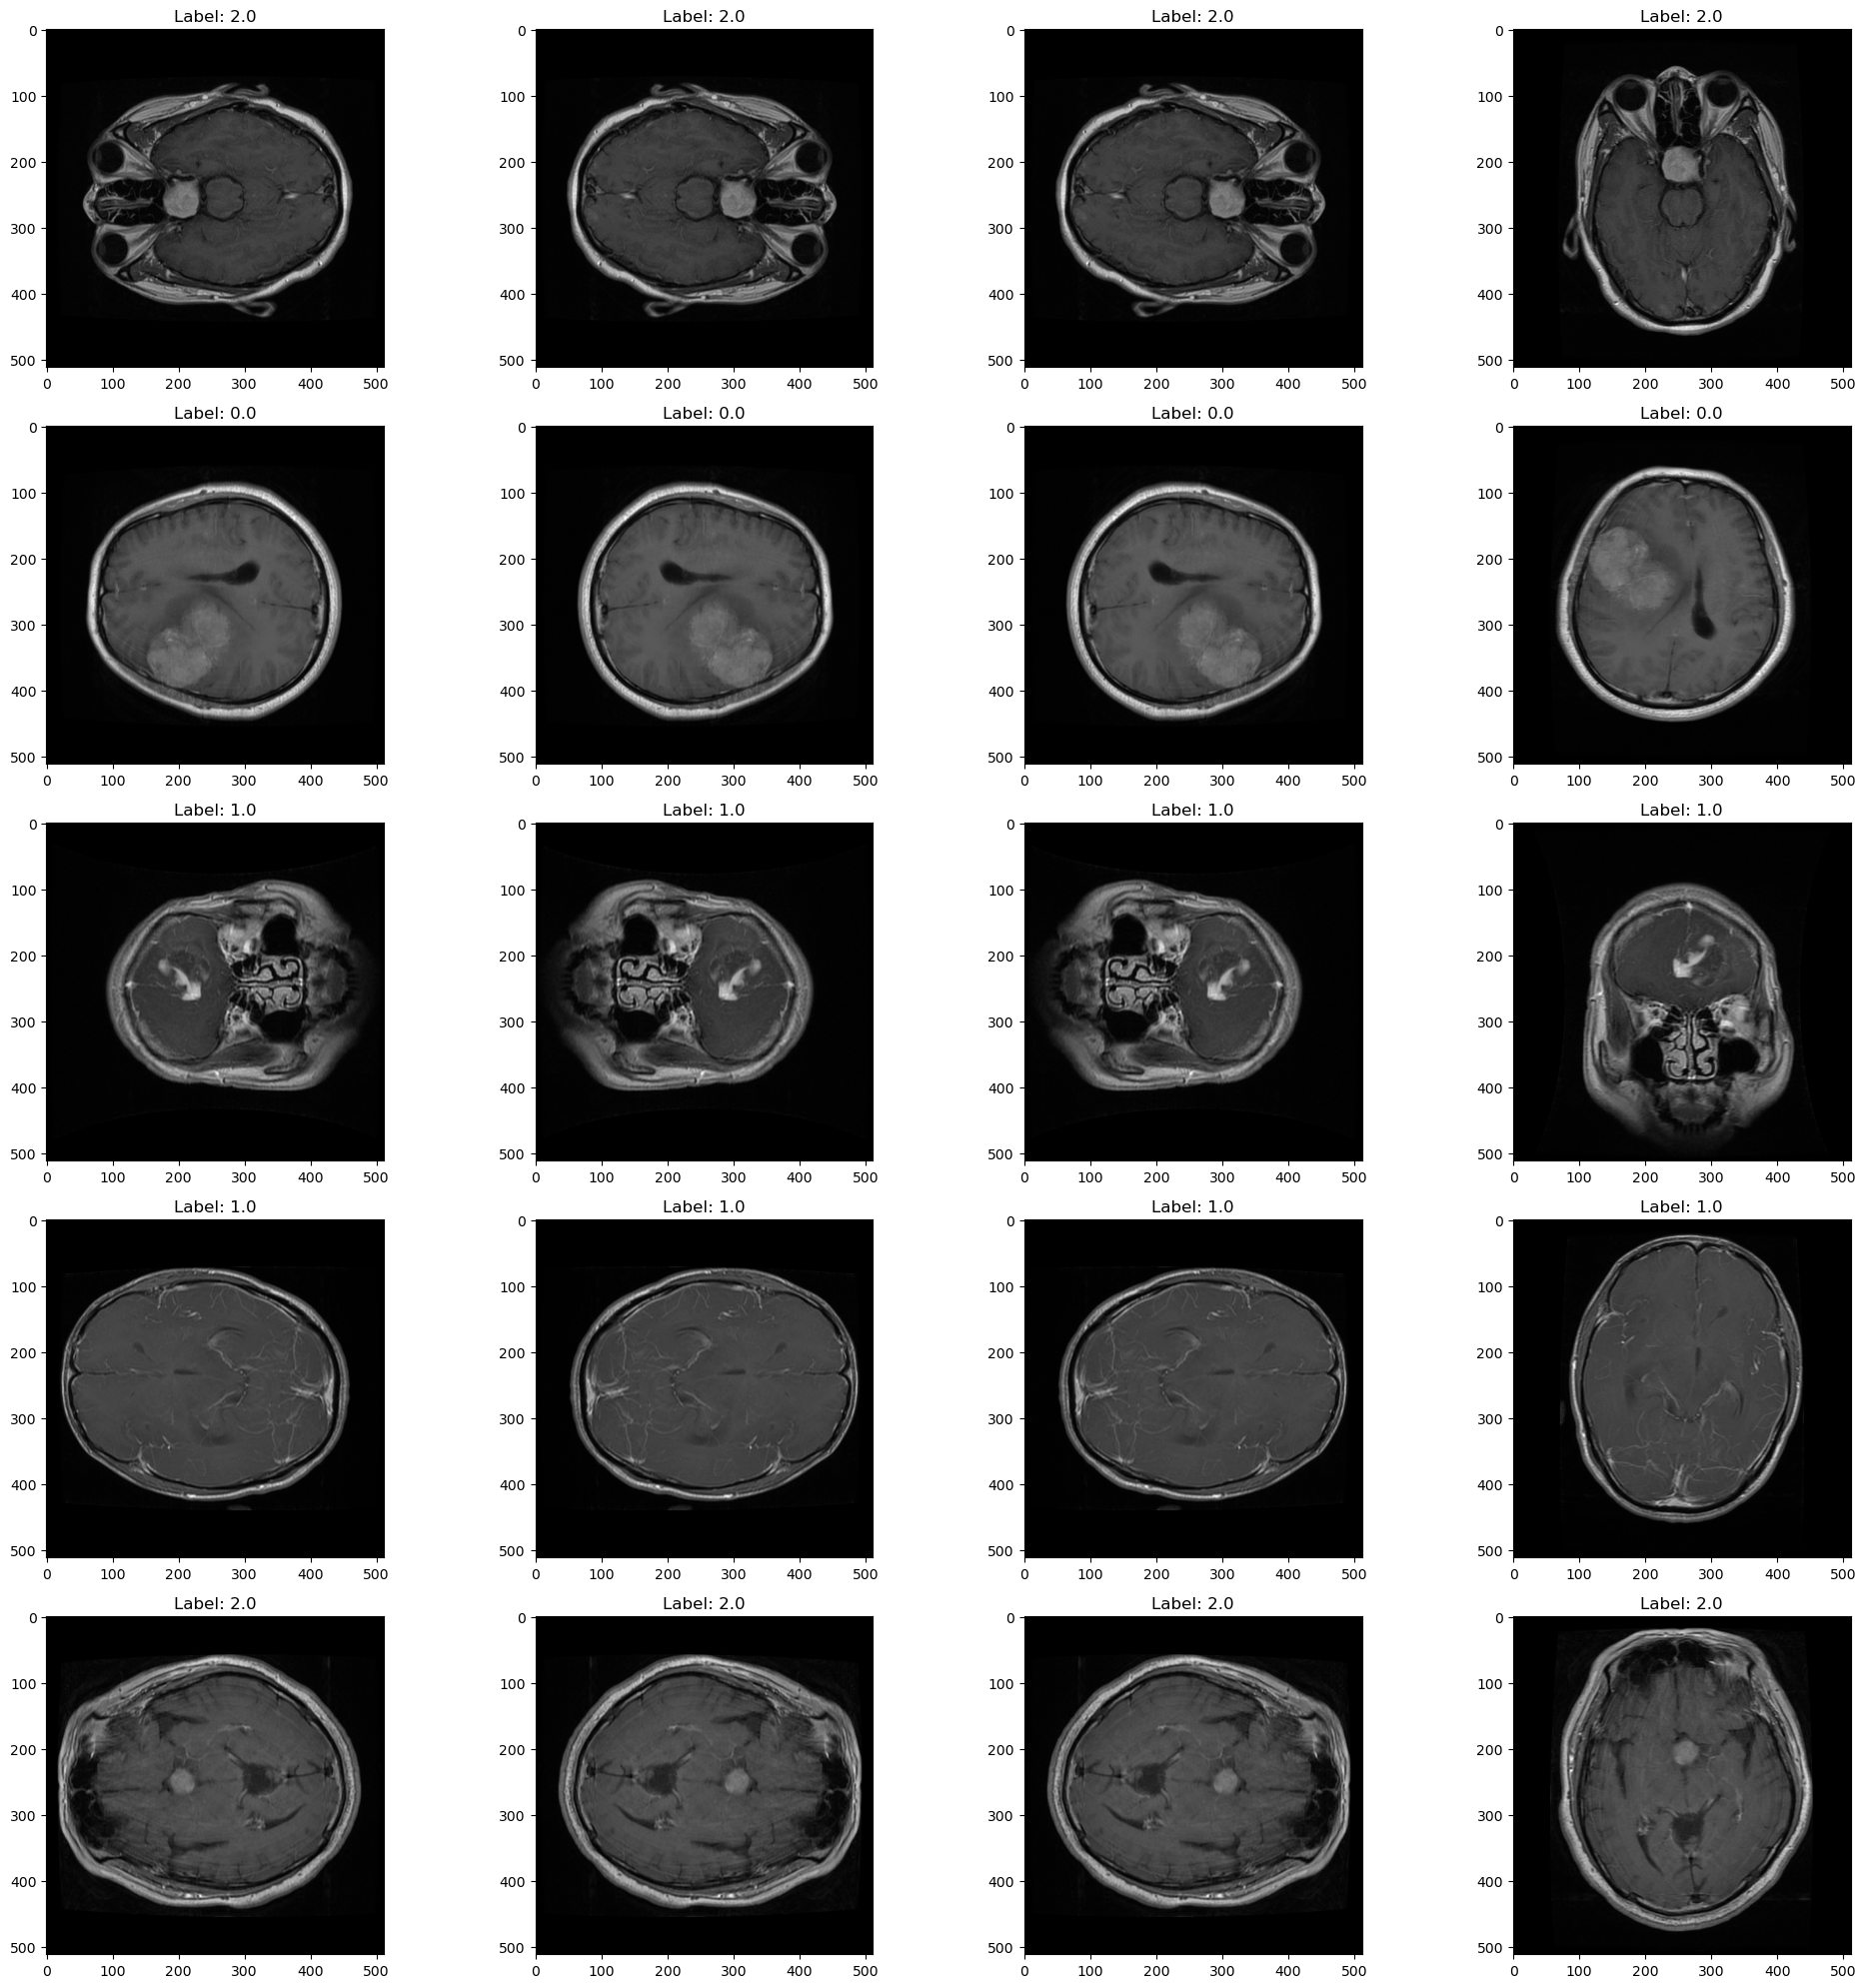

In [26]:
# Train the model

# print the information of the training and validation generators
# Generate a batch from the training generator
images, labels = next(iter(train_gen))

# Print the lengths
print(f'Length of image array: {len(images)}')
print(f'Length of label array: {len(labels)}')

# Generate a batch from the validation generator
images_val, labels_val = next(iter(val_gen))

# Print the lengths
print(f'Length of validation image array: {len(images_val)}')
print(f'Length of validation label array: {len(labels_val)}')

# print the image and label of 5 random samples from the training generator
fig, ax = plt.subplots(5, 4, figsize=(20, 20))
for i in range(5):
    images, labels = train_gen[i]
    for j in range(4):
        ax[i, j].imshow(images[j].squeeze(), cmap='gray')
        ax[i, j].set_title(f'Label: {labels[j]}')
plt.tight_layout()
plt.show()

# Print the image and label of 5 random samples from the validation generator
fig, ax = plt.subplots(5, 4, figsize=(20, 20))
for i in range(5):
    images_val, labels_val = val_gen[i]
    for j in range(4):
        ax[i, j].imshow(images_val[j].squeeze(), cmap='gray')
        ax[i, j].set_title(f'Label: {labels_val[j]}')
plt.tight_layout()
plt.show()

# <i> Training the model </i>

<div style="font-size:16px">

The `model.fit` function in this code is used to train the machine learning model for $2$ epochs using `train_gen` as the training data and `val_gen` as the validation data. The `verbose=0` argument suppresses the training progress output. We further apply k-cross fold validation to prevent overfitting. 

</div>

In [ ]:
from sklearn.model_selection import KFold

k = 4  # Number of folds
kf = KFold(n_splits=k)

# Redirect stdout to null
# orig_stdout = sys.stdout
# sys.stdout = open(os.devnull, 'w')

# Deprecated model with no k-cross validation
# history = model.fit(train_gen, 
#                     validation_data=val_gen, 
#                     epochs=2,
#                     verbose=0)

histories = []  # List to store history for each fold

for train_indices, val_indices in kf.split(data_list):
    # Split the data into training and validation sets
    train_data = [data_list[i] for i in train_indices]
    val_data = [data_list[i] for i in val_indices]

    # Create data generators
    train_gen = DataGenerator(train_data, batch_size=64, augmentations=[augment_data])
    val_gen = DataGenerator(val_data, batch_size=64, augmentations=[augment_data])

    # Fit the model
    history = model.fit(train_gen, validation_data=val_gen, epochs=5)
                        #, verbose=0)
    histories.append(history)

# Reset stdout
# sys.stdout = orig_stdout

# <i> Evaluating the model </i>

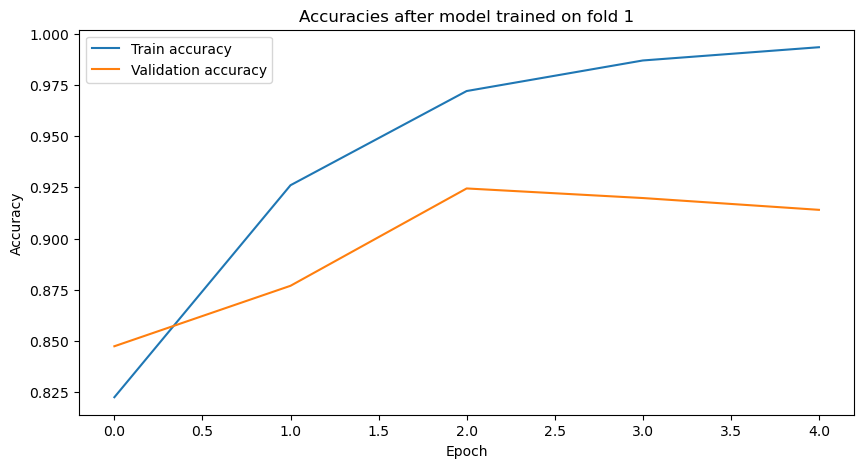

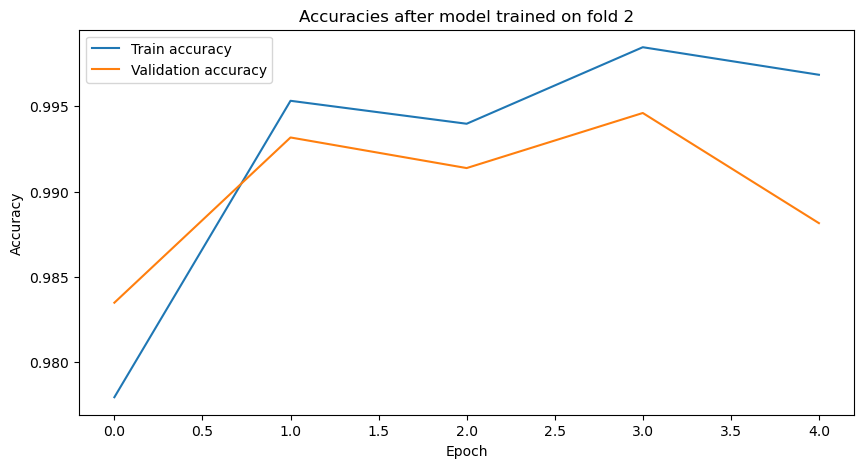

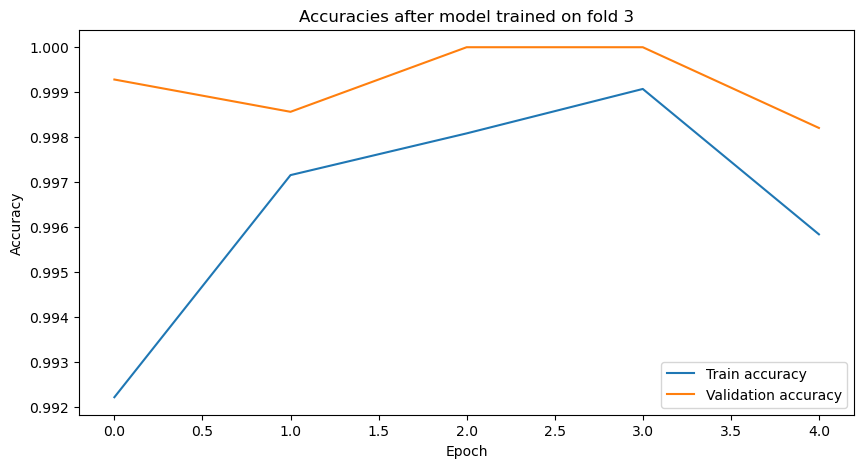

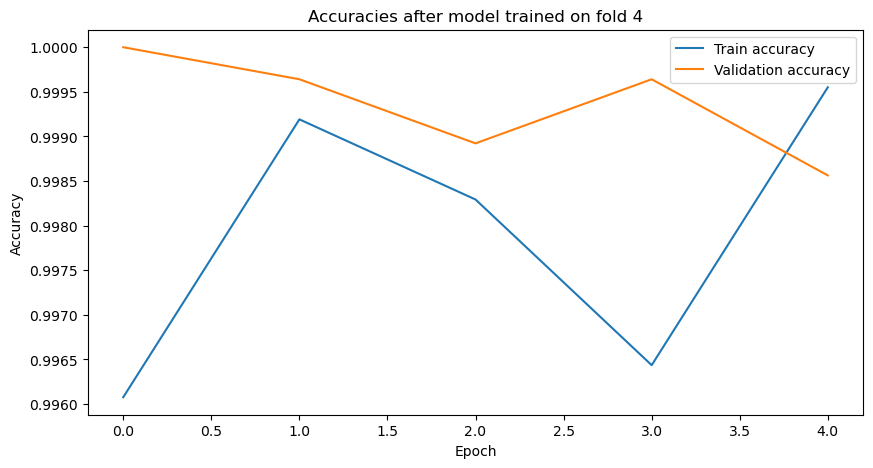

In [53]:
for i, history in enumerate(histories):
    plt.figure(figsize=(10, 5)) 
    plt.plot(history.history['accuracy'], label='Train accuracy') 
    plt.plot(history.history['val_accuracy'], label='Validation accuracy') 
    plt.xlabel('Epoch') 
    plt.ylabel('Accuracy') 
    plt.title(f'Accuracies after model trained on fold {i+1}')
    plt.legend() 
    plt.show()

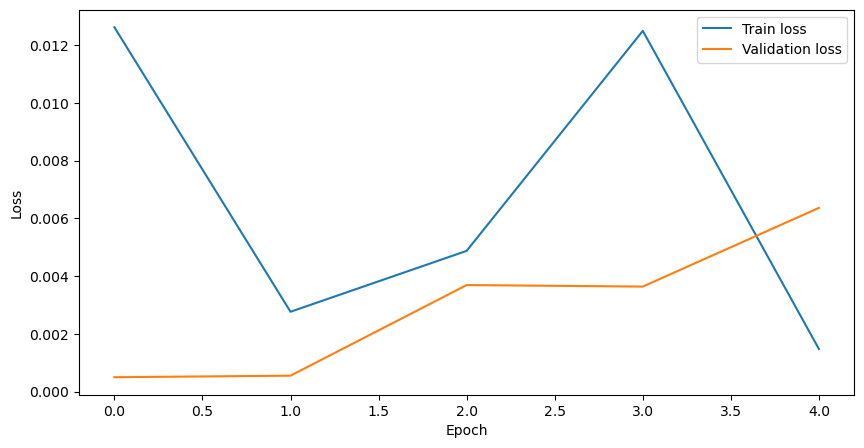

In [32]:
# Visualize the loss of the model during training
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## <i> Loading unseen test data </i> 

In [33]:
# Generate a batch from the validation generator
test_gen = DataGenerator(test_data, batch_size=32, augmentations=[augment_data])

## <i> Evaluating model performance on the test set </i>

In [34]:
# Evaluate the model
loss, accuracy = model.evaluate(test_gen, verbose=0)

# Display results

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

Batch 0 - Images shape: (32, 512, 512, 1), Labels shape: (32,)
Batch 0 - Images shape: (32, 512, 512, 1), Labels shape: (32,)
Batch 1 - Images shape: (32, 512, 512, 1), Labels shape: (32,)
Batch 2 - Images shape: (32, 512, 512, 1), Labels shape: (32,)
Batch 3 - Images shape: (32, 512, 512, 1), Labels shape: (32,)
Batch 4 - Images shape: (32, 512, 512, 1), Labels shape: (32,)
Batch 5 - Images shape: (32, 512, 512, 1), Labels shape: (32,)
Batch 6 - Images shape: (32, 512, 512, 1), Labels shape: (32,)
Batch 7 - Images shape: (32, 512, 512, 1), Labels shape: (32,)
Batch 8 - Images shape: (32, 512, 512, 1), Labels shape: (32,)
Batch 9 - Images shape: (32, 512, 512, 1), Labels shape: (32,)
Batch 10 - Images shape: (32, 512, 512, 1), Labels shape: (32,)
Batch 11 - Images shape: (32, 512, 512, 1), Labels shape: (32,)
Batch 12 - Images shape: (32, 512, 512, 1), Labels shape: (32,)
Batch 13 - Images shape: (32, 512, 512, 1), Labels shape: (32,)
Batch 14 - Images shape: (32, 512, 512, 1), Labels 

## <i> Analyzing Incorrect Predictions </i>

In [ ]:
# Initialize an empty list to store the true and predicted labels
true_labels = []
predicted_labels = []
misclassified_samples = []

# Iterate over all batches in the test generator
for images, labels in test_gen:
    # Predict the labels
    predictions = model.predict(images) + 1
    
    # Convert the one-hot encoded predictions to integers
    prediction = np.argmax(predictions, axis=1) 
    
    # Append the true and predicted labels to the respective lists
    true_labels.extend(labels)
    predicted_labels.extend(prediction)

    # Find the misclassified indices in this batch
    misclassified_indices = np.where(labels != prediction)[0]

    # Append the misclassified samples to the list
    misclassified_samples.extend([(images[i], labels[i], prediction[i]) for i in misclassified_indices])

16


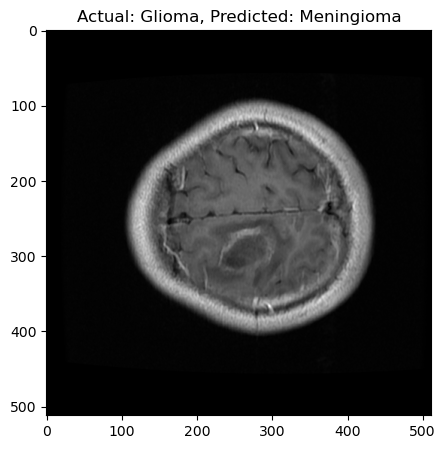

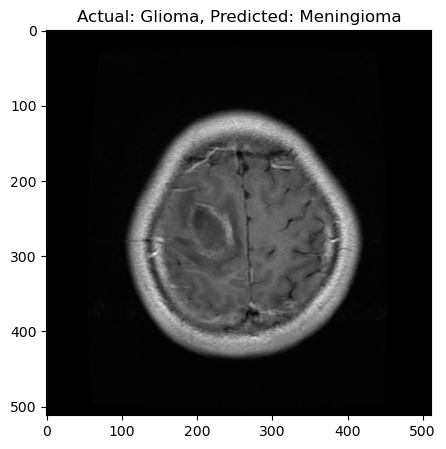

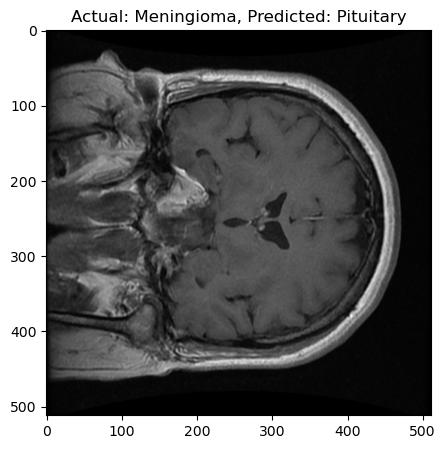

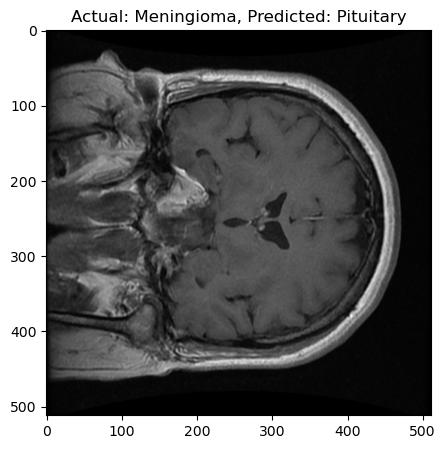

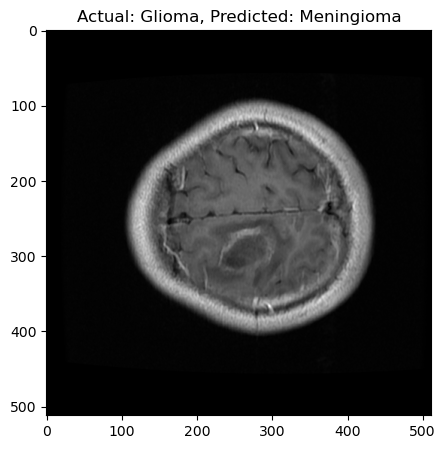

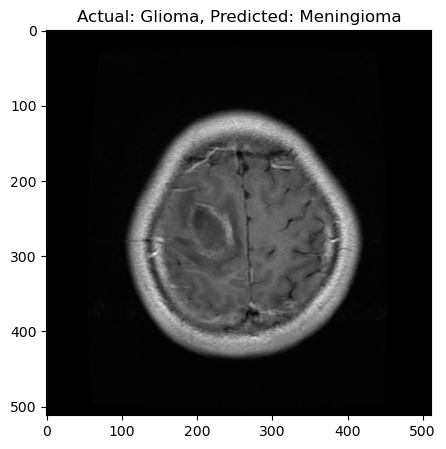

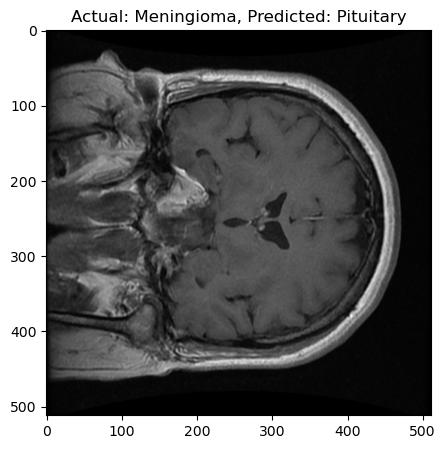

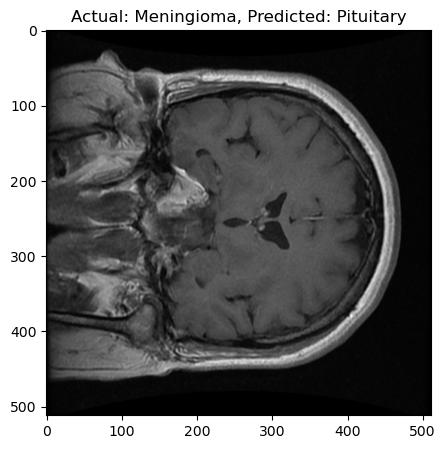

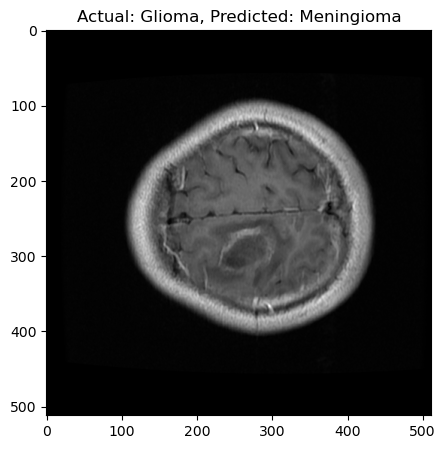

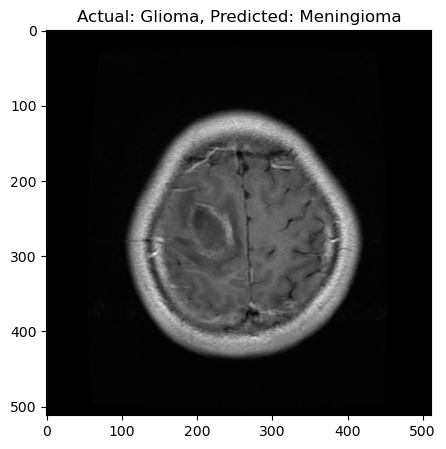

In [70]:
# Display the misclassified samples

classes = {0: 'Meningioma', 1: 'Glioma', 2: 'Pituitary'}

num_images_to_display = min(10, len(misclassified_samples))
print(len(misclassified_samples))

for i in range(num_images_to_display):
    image, true_label, predicted_label = misclassified_samples[i]
    plt.figure(figsize=(5, 5))
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Actual: {classes[int(true_label)]}, Predicted: {classes[predicted_label]}')
    plt.show()

## <i> Model Performance Evaluation </i>

In [35]:
# generate a correlation matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

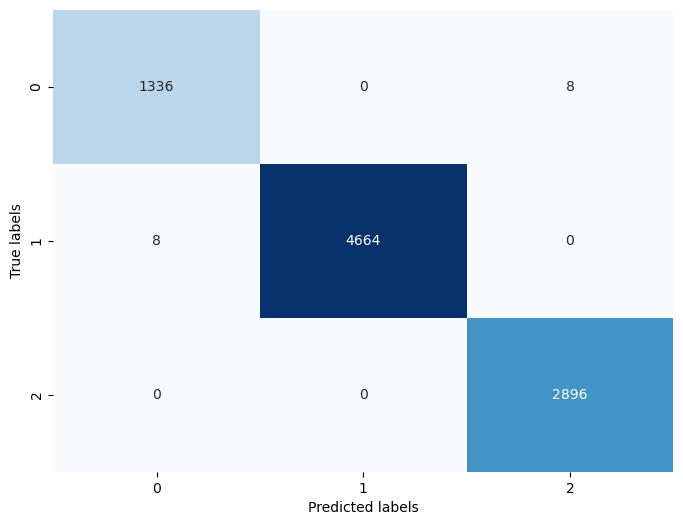

In [36]:
# Initialize an empty list to store the true and predicted labels
true_labels = []
predicted_labels = []

# Redirect stdout to null
orig_stdout = sys.stdout
sys.stdout = open(os.devnull, 'w')

# Iterate over all batches in the test generator
for images, labels in test_gen:
    # Predict the labels
    predictions = model.predict(images)
    
    # Convert the one-hot encoded predictions to integers
    prediction = np.argmax(predictions, axis=1) + 1
    
    # Append the true and predicted labels to the respective lists
    true_labels.extend(labels)
    predicted_labels.extend(prediction)

# Restore stdout
sys.stdout = orig_stdout

# Convert the lists to numpy arrays
true_labels = np.array(true_labels).astype(int)  # Ensure true labels are integers
predicted_labels = np.array(predicted_labels)

# Generate the confusion matrix
cm = confusion_matrix(true_labels + 1, predicted_labels)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [37]:
# Restore stdout
sys.stdout = orig_stdout
# print the unique true and predicted labels
print(f'Unique true labels: {np.unique(true_labels + 1)}')
print(f'Unique predicted labels: {np.unique(predicted_labels)}')


Unique true labels: [1 2 3]
Unique predicted labels: [1 2 3]


              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1344
           2       1.00      1.00      1.00      4672
           3       1.00      1.00      1.00      2896

    accuracy                           1.00      8912
   macro avg       1.00      1.00      1.00      8912
weighted avg       1.00      1.00      1.00      8912



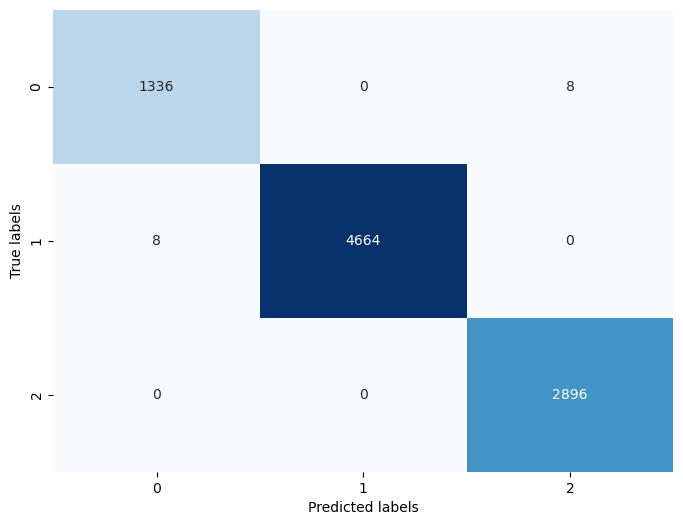

In [38]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(true_labels + 1, predicted_labels))

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

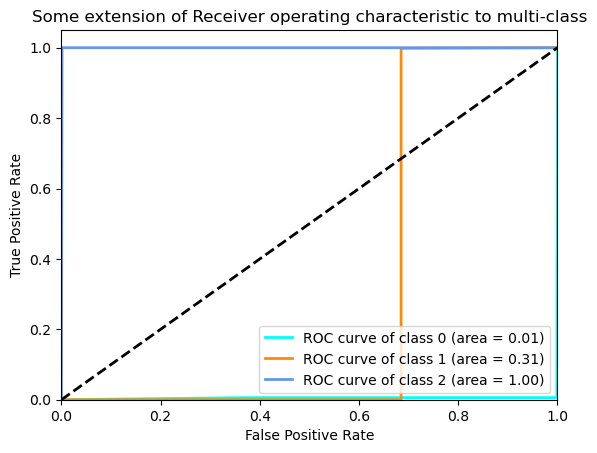

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt

# Binarize the output
true_labels_bin = label_binarize(true_labels, classes=[0, 1, 2])
n_classes = true_labels_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], predicted_labels)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# <i> Saving the model </i>

In [42]:
# save the model as base_classifier.h5

model.save('base_classifier')


INFO:tensorflow:Assets written to: base_classifier\assets


INFO:tensorflow:Assets written to: base_classifier\assets


In [43]:
model.save('advanced_model.h5')

c:\Users\Kirin\miniconda3\envs\170_final\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
